In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:\climate-risk-index-1.csv")  # replace with your dataset
df.head()


,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

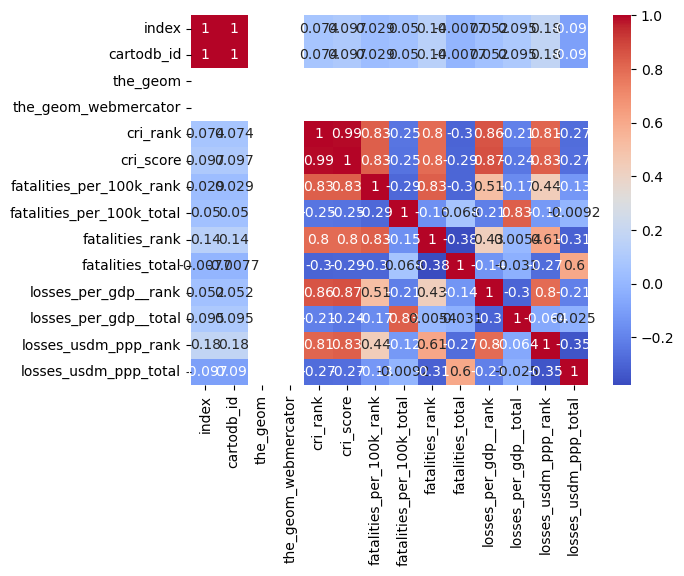

In [6]:
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()



In [9]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale data (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


C:\Users\91996\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\91996\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\91996\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop([
    "cri_score",
    "index",
    "cartodb_id",
    "the_geom",
    "the_geom_webmercator",
    "country",
    "rw_country_code",
    "rw_country_name"
], axis=1, errors="ignore")

y = df["cri_score"]

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['cri_rank', 'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_name_Mozambique'],
      dtype='object')
